# Task 1

In this notebook, the following has been done:
1. Retrieving an image based on ImageID
2. Computation of Color moments, CM8x8 for given imageID
3. Computation of Extended Local binary patterns, ELBP for given imageID
4. Histograms of oriented gradients, HOG for given imageID

In [2]:
# Imports

import os
import sys
import csv
import scipy
import skimage
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from skimage.feature import hog, local_binary_pattern
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import normalize

In [3]:
# Global Constants

CURRENT_PATH = Path(os.getcwd())
IMGS_DIR = CURRENT_PATH.parent / "Outputs" / "Task0" / "Images"
TARGET_DIR = CURRENT_PATH.parent / "Outputs" / "Task0" / "Target"

WRITE_DIR =  CURRENT_PATH.parent / "Outputs" / "Task1" 

In [4]:
# Create WRITE_DIR if it does not exist

WRITE_DIR.mkdir(parents=True, exist_ok=True)

### Enter ImageID of Interest

In [5]:
IMAGE_ID = "0_0" # In the format: <subjectId, imageId>

## 1.  Retrieving an image based on Image ID

In [ ]:
# Retrieving Image

file_name = IMAGE_ID + ".tif"
image_path = IMGS_DIR / file_name
image = Image.open(str(image_path))
np_image = np.array(image)

# Plotting Image
plt.imshow(np_image, cmap='gray')
plt.title("Image of Interest")
plt.xticks([])
plt.yticks([])
plt.show()

## 2. Computation of Color moments, CM8x8

In [7]:
np.set_printoptions(threshold=sys.maxsize)
np_image

array([[0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ,
        0.607438  , 0.6570248 , 0.677686  , 0.69008267, 0.6859504 ,
        0.70247936, 0.6983471 , 0.6942149 , 0.6983471 , 0.69008267,
        0.6942149 , 0.69008267, 0.6983471 , 0.70247936, 0.70247936,
        0.6983471 , 0.7066116 , 0.7107438 , 0.71900827, 0.72727275,
        0.75619835, 0.77272725, 0.7768595 , 0.7768595 , 0.75619835,
        0.76033056, 0.78099173, 0.76033056, 0.76859504, 0.75619835,
        0.73966944, 0.74380165, 0.73966944, 0.74380165, 0.71900827,
        0.71900827, 0.71487606, 0.71900827, 0.71900827, 0.7231405 ,
        0.72727275, 0.7355372 , 0.71487606, 0.7231405 , 0.71900827,
        0.71487606, 0.7107438 , 0.70247936, 0.7066116 , 0.6983471 ,
        0.677686  , 0.6570248 , 0.6322314 , 0.5661157 , 0.5247934 ,
        0.446281  , 0.37190083, 0.3305785 , 0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, 0.47107437, 0.553719  ,
        0.62396693, 0.6694215 , 0.6859504 , 0.69008267, 0.6

In [8]:
# Creation on 64 windows (8x8) from original image

windows = []
for x in range(0,64,8):
    for y in range(0,64,8):
        window = np_image[x:x+8, y:y+8]
        windows.append(window)
        
windows = np.array(windows)

In [9]:
# Calculating mean, std. deviation and skewness for each 8x8 window

means = []
stds = []
skews = []

fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(17, 17))
ax = ax.flatten()

for index in range(0,len(windows)):
    # Extracting window
    window = windows[index]
    flatten_window = window.flatten()
    
    # Calculating mean, std deviation and skewness for window
    mean = np.mean(flatten_window)
    std = np.std(flatten_window)
    skew = scipy.stats.skew(flatten_window)
    
    # Plotting results in a figure
    ax[index].imshow(window, cmap='gray')
    ax[index].set_xticks([])
    ax[index].set_yticks([])
    ax[index].set_title("Mean: {:.2f}\nStd: {:.2f}\nSkew: {:.2f}".format(mean,std,skew), fontsize=8.5)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)
    
    # Appending results of each window to a list
    means.append(mean)
    stds.append(std)
    skews.append(skew)

In [10]:
# Write path for color moments
color_moments_write_path = WRITE_DIR / "color_moments.csv"

In [11]:
# Writing results into a file
with open(color_moments_write_path, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(["WindowID", "Mean", "Std. Deviation", "Skewness"])
    
    for window_id, mean, std, skew in zip(range(0, len(windows)), means, stds, skews):
        csvwriter.writerow([window_id, mean, std, skew])

## 3. Computation of Extended Local binary patterns, ELBP for given imageID

In [137]:
# Calculation of ELBP for the image of interest

points = 8
radius = 1
method = 'ror'
elbp = local_binary_pattern(np_image, P=points, R=radius, method=method)

In [138]:
# Bining the results of ELBP

bins = 2**points

bining_results = np.histogram(elbp, bins=bins, range=(0.0, float(bins)))

In [139]:
# Plotting bining results of ELBP

plt.figure(figsize=(15,7))
plt.bar(bining_results[1][1:], bining_results[0] ,width=2)
plt.xticks(np.arange(0, 270, 10))
plt.xlabel("ELBP Values")
plt.ylabel("Frequency")
plt.title("Plotting ELBP Feature Descriptor")
plt.show()

In [140]:
# Write path for ELBP

elbp_write_path = WRITE_DIR / "elbp.csv"

In [141]:
# Writing results into a file

with open(elbp_write_path, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(["ELBP Value", "Frequency"])
    
    for elbp_value, frequency in zip(range(0, bins), bining_results[0]):
        csvwriter.writerow([elbp_value, frequency])

# 4. Histograms of oriented gradients, HOG for given imageID

In [146]:
fd, hog_image = hog(np_image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

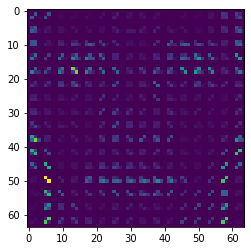

In [148]:
plt.imshow(hog_image)
plt.show()

In [150]:
# Write path for HOG

hog_write_path = WRITE_DIR / "hog.csv"

In [152]:
# Writing results into a file

with open(hog_write_path, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(["HOG Feature Vector"])
    
    for hog_value in fd:
        csvwriter.writerow([hog_value])